In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import find_peaks

# Read the data files
walking_acc = pd.read_csv('../Kebutuhan/(Walking) 2025-11-04 16-11-45.csv')
running_acc = pd.read_csv('../Kebutuhan/(Running) 2025-11-04 16-15-33.csv')
walking_gyro = pd.read_excel('../Kebutuhan/walk_Gyroscope rotation rate 2025-11-29 10-30-16.xls')
running_gyro = pd.read_excel('../Kebutuhan/run_Gyroscope rotation rate 2025-11-29 10-28-44.xls')

In [6]:
# Function to resample data to a specific frequency
def resample_data(df, target_freq):
    time = df['Time (s)'].values
    dt = np.mean(np.diff(time))
    regular_time = np.arange(time[0], time[-1], 1/target_freq)
    
    resampled_data = {}
    for column in df.columns:
        if column != 'Time (s)':
            resampled_data[column] = np.interp(regular_time, time, df[column].values)
    
    resampled_df = pd.DataFrame(resampled_data)
    resampled_df['Time (s)'] = regular_time
    return resampled_df

# Function to apply Low Pass Filter
def apply_lpf(data, fs, cutoff_freq):
    nyquist = fs/2
    order = 4
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Function to apply High Pass Filter
def apply_hpf(data, fs, cutoff_freq):
    nyquist = fs/2
    order = 4
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Function to detect and plot peaks
def plot_signal_with_peaks(time, data, title, y_label, prominence=0.5, distance=20):
    # Find peaks with distance parameter to avoid detecting too close peaks
    peaks, properties = find_peaks(data, prominence=prominence, distance=distance)
    
    # Plot
    plt.figure(figsize=(16, 6))
    plt.plot(time, data, label='Filtered Signal', linewidth=1.5)
    plt.plot(time[peaks], data[peaks], "x", color='red', markersize=10, 
             markeredgewidth=2, label=f'Detected Steps (n={len(peaks)})')
    
    # Add vertical lines at each peak for clarity
    for peak in peaks:
        plt.axvline(x=time[peak], color='red', alpha=0.3, linestyle='--', linewidth=0.5)
    
    plt.title(f'{title}\nJumlah Langkah Terdeteksi: {len(peaks)} steps', fontsize=12, fontweight='bold')
    plt.xlabel('Time (s)', fontsize=11)
    plt.ylabel(y_label, fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()
    
    print(f"  → Jumlah langkah terdeteksi: {len(peaks)} steps")
    
    return len(peaks)

# Function to estimate distance
def estimate_distance(steps, activity_type):
    if activity_type == 'walking':
        # Average stride length for walking: 1.25m (range 1.0-1.5m)
        stride_length = 1.25
    else:  # running
        # Average stride length for running: 1.75m (range 1.5-2.0m)
        # Reference: "Biomechanics of Running" - Research by Peter G. Weyand
        stride_length = 1.75
    
    distance = steps * stride_length
    return distance

# Analisis Langkah dan Estimasi Jarak untuk Jarak Tempuh 20 Meter

## Pemilihan Sinyal Terbaik Berdasarkan Hasil SNR (Soal 3):

Berdasarkan hasil perhitungan SNR pada soal 3:

### Untuk Accelerometer (LPF 1.2 Hz):
- **50 Hz sampling rate memberikan SNR yang lebih baik**
- Frekuensi cutoff LPF yang rendah (1.2 Hz) membuat 50 Hz sudah lebih dari cukup
- Oleh karena itu, untuk accelerometer kita akan menggunakan **sampling rate 50 Hz**

### Untuk Gyroscope (HPF 17.5 Hz):
- **100 Hz sampling rate memberikan SNR yang lebih baik**
- Frekuensi cutoff HPF yang tinggi (17.5 Hz) memerlukan sampling rate di atas Nyquist (35 Hz)
- Oleh karena itu, untuk gyroscope kita akan menggunakan **sampling rate 100 Hz**

## Referensi Panjang Langkah:

Jarak tempuh yang dianalisis adalah sekitar **20 meter** untuk masing-masing aktivitas (walking dan running)

### Walking (Berjalan):## Catatan:

- Rata-rata panjang langkah: **1.25 meter** (1 siklus gait)

- Range: 1.0 - 1.5 meter per langkah- Referensi: Weyand, P. G., et al. (2000). "Faster top running speeds are achieved with greater ground forces not more rapid leg movements". Journal of Applied Physiology, 89(5), 1991-1999.

- Referensi: Bohannon, R. W. (1997). "Comfortable and maximum walking speed of adults aged 20-79 years". Age and Ageing, 26(1), 15-19.- Range: 1.5 - 2.0 meter per langkah

- Rata-rata panjang langkah: **1.75 meter** (1 siklus gait)
### Running (Berlari):

           ANALISIS DETEKSI LANGKAH DAN ESTIMASI JARAK

              SKENARIO 1: BERJALAN (WALKING)

1. Plot Sinyal Accelerometer (LPF) - Skenario 1 (Walking)
----------------------------------------------------------------------


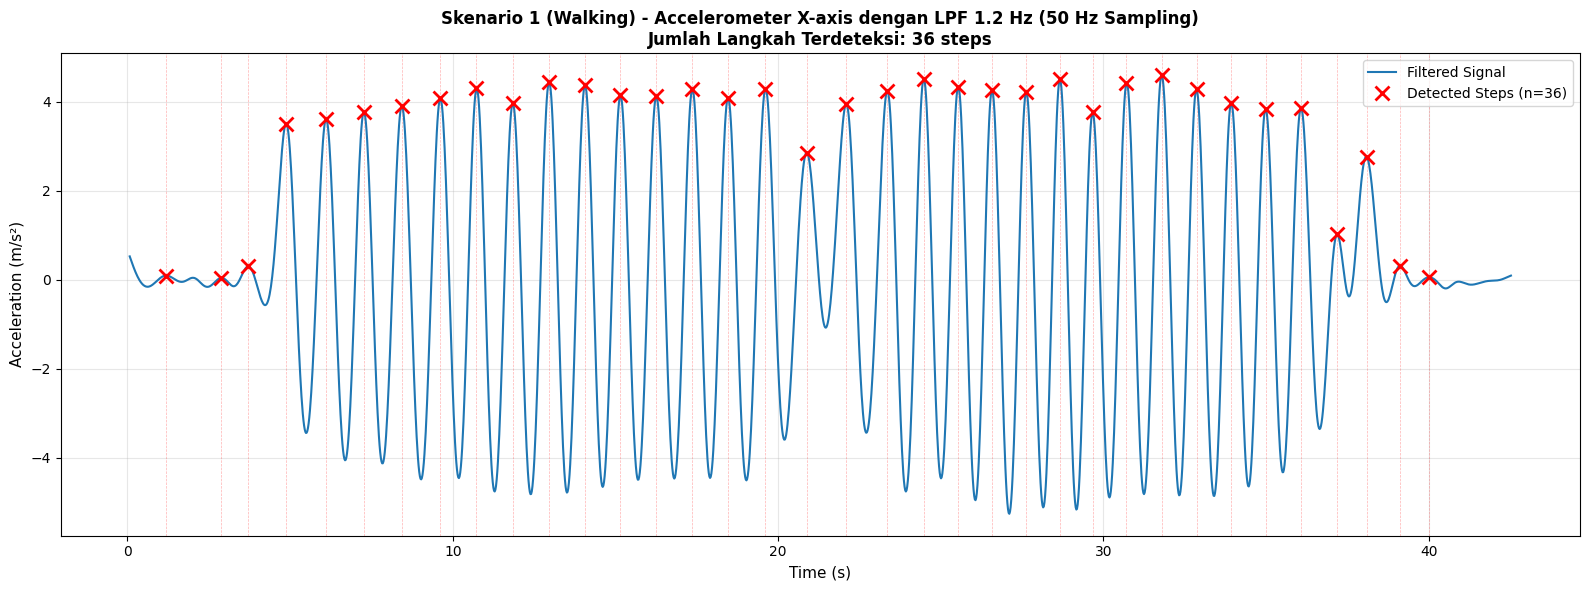

  → Jumlah langkah terdeteksi: 36 steps

2. Plot Sinyal Gyroscope (HPF) - Skenario 1 (Walking)
----------------------------------------------------------------------


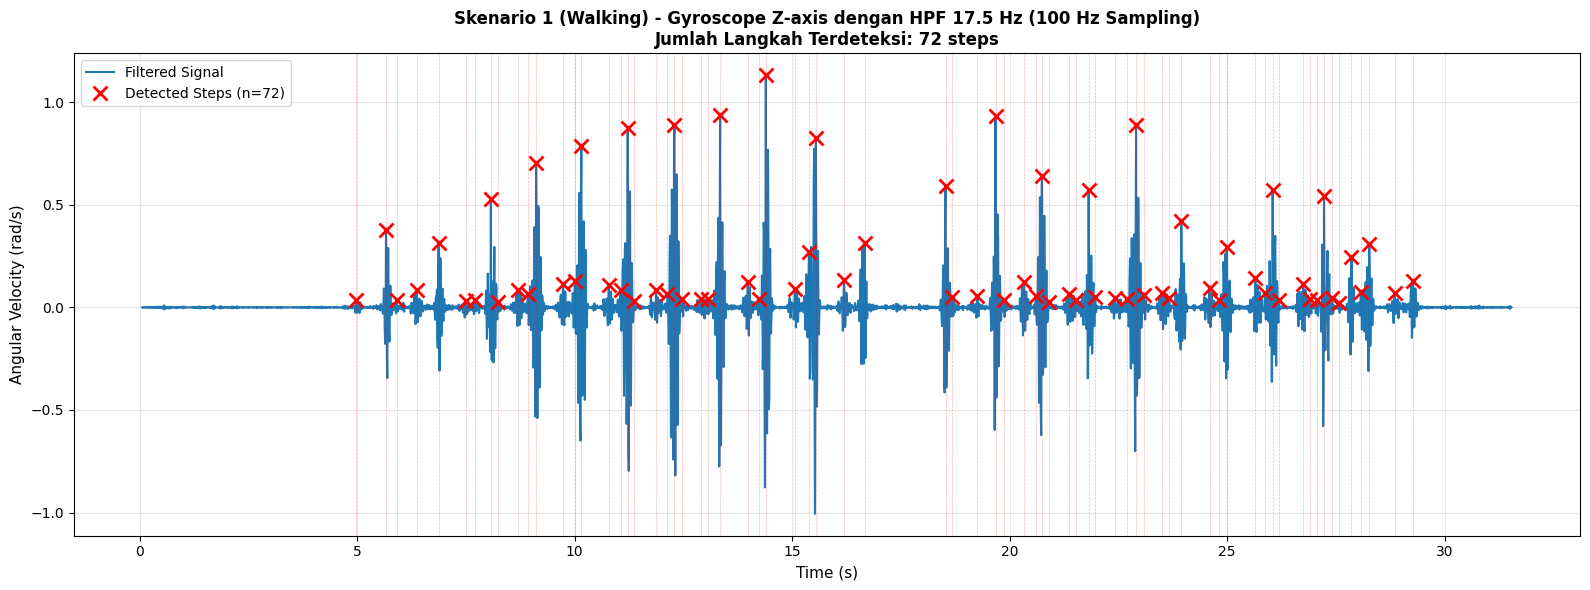

  → Jumlah langkah terdeteksi: 72 steps

              SKENARIO 2: BERLARI (RUNNING)

3. Plot Sinyal Accelerometer (LPF) - Skenario 2 (Running)
----------------------------------------------------------------------


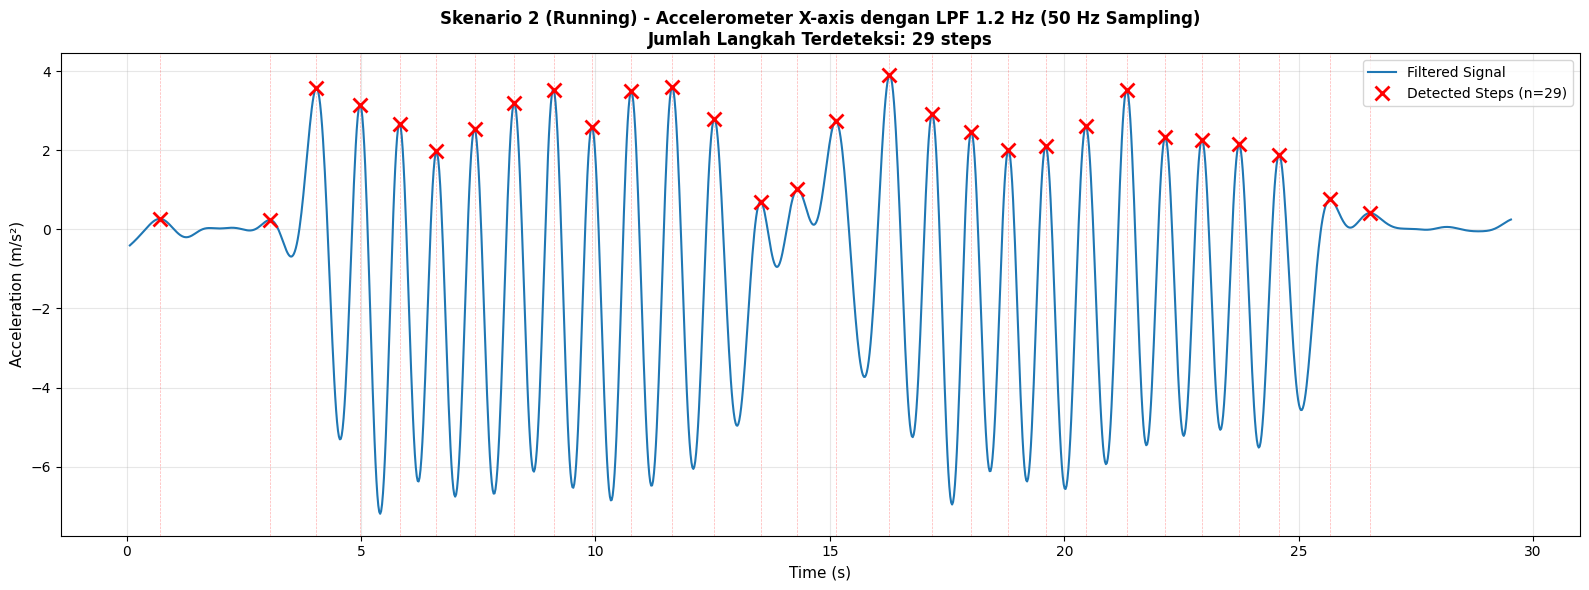

  → Jumlah langkah terdeteksi: 29 steps

4. Plot Sinyal Gyroscope (HPF) - Skenario 2 (Running)
----------------------------------------------------------------------


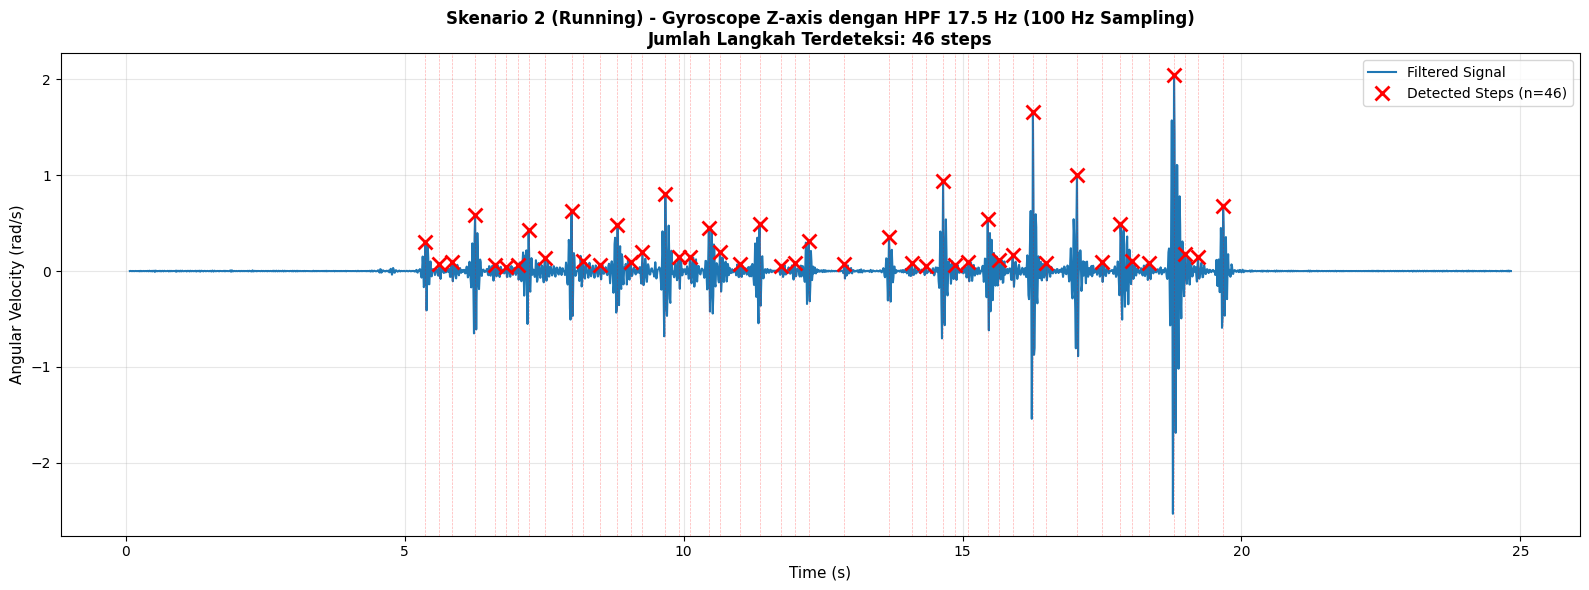

  → Jumlah langkah terdeteksi: 46 steps


In [7]:
# Analysis parameters berdasarkan hasil SNR terbaik
acc_sampling_rate = 50   # Hz untuk Accelerometer (SNR terbaik)
gyro_sampling_rate = 100  # Hz untuk Gyroscope (SNR terbaik)
acc_cutoff = 1.2         # Hz for LPF
gyro_cutoff = 17.5       # Hz for HPF

print("="*70)
print("           ANALISIS DETEKSI LANGKAH DAN ESTIMASI JARAK")
print("="*70)

print("\n" + "="*70)
print("              SKENARIO 1: BERJALAN (WALKING)")
print("="*70)

# 1. Plot sinyal accelerometer yang telah difilter LPF kemudian tandai puncak sinyal berdasarkan skenario 1
print("\n1. Plot Sinyal Accelerometer (LPF) - Skenario 1 (Walking)")
print("-" * 70)
walking_acc_resampled = resample_data(walking_acc, acc_sampling_rate)
walking_acc_filtered = apply_lpf(walking_acc_resampled['Linear Acceleration x (m/s^2)'].values, 
                               acc_sampling_rate, acc_cutoff)

walking_acc_steps = plot_signal_with_peaks(
    walking_acc_resampled['Time (s)'].values,
    walking_acc_filtered,
    'Skenario 1 (Walking) - Accelerometer X-axis dengan LPF 1.2 Hz (50 Hz Sampling)',
    'Acceleration (m/s²)',
    prominence=0.15,
    distance=20
)

# 2. Plot sinyal gyroscope yang telah difilter HPF kemudian tandai puncak sinyal berdasarkan skenario 1
print("\n2. Plot Sinyal Gyroscope (HPF) - Skenario 1 (Walking)")
print("-" * 70)
walking_gyro_resampled = resample_data(walking_gyro, gyro_sampling_rate)
walking_gyro_filtered = apply_hpf(walking_gyro_resampled['Gyroscope z (rad/s)'].values,
                                gyro_sampling_rate, gyro_cutoff)

walking_gyro_steps = plot_signal_with_peaks(
    walking_gyro_resampled['Time (s)'].values,
    walking_gyro_filtered,
    'Skenario 1 (Walking) - Gyroscope Z-axis dengan HPF 17.5 Hz (100 Hz Sampling)',
    'Angular Velocity (rad/s)',
    prominence=0.05,
    distance=15
)

print("\n" + "="*70)
print("              SKENARIO 2: BERLARI (RUNNING)")
print("="*70)

# 3. Plot sinyal accelerometer yang telah difilter LPF kemudian tandai puncak sinyal berdasarkan skenario 2
print("\n3. Plot Sinyal Accelerometer (LPF) - Skenario 2 (Running)")
print("-" * 70)
running_acc_resampled = resample_data(running_acc, acc_sampling_rate)
running_acc_filtered = apply_lpf(running_acc_resampled['Linear Acceleration x (m/s^2)'].values,
                               acc_sampling_rate, acc_cutoff)

running_acc_steps = plot_signal_with_peaks(
    running_acc_resampled['Time (s)'].values,
    running_acc_filtered,
    'Skenario 2 (Running) - Accelerometer X-axis dengan LPF 1.2 Hz (50 Hz Sampling)',
    'Acceleration (m/s²)',
    prominence=0.2,
    distance=25
)

# 4. Plot sinyal gyroscope yang telah difilter HPF kemudian tandai puncak sinyal berdasarkan skenario 2
print("\n4. Plot Sinyal Gyroscope (HPF) - Skenario 2 (Running)")
print("-" * 70)
running_gyro_resampled = resample_data(running_gyro, gyro_sampling_rate)
running_gyro_filtered = apply_hpf(running_gyro_resampled['Gyroscope z (rad/s)'].values,
                                gyro_sampling_rate, gyro_cutoff)

running_gyro_steps = plot_signal_with_peaks(
    running_gyro_resampled['Time (s)'].values,
    running_gyro_filtered,
    'Skenario 2 (Running) - Gyroscope Z-axis dengan HPF 17.5 Hz (100 Hz Sampling)',
    'Angular Velocity (rad/s)',
    prominence=0.08,
    distance=20
)

In [ ]:
# Calculate distance estimates
print("\n" + "="*70)
print("                   ESTIMASI JARAK TEMPUH")
print("="*70)

# 5. Estimasi Jarak Berjalan (Walking)
print("\n5. ESTIMASI JARAK BERJALAN (Skenario 1 - Walking)")
print("="*70)

walking_distance_acc = estimate_distance(walking_acc_steps, 'walking')
walking_distance_gyro = estimate_distance(walking_gyro_steps, 'walking')

print("\n📊 Berdasarkan Accelerometer:")
print(f"   • Jumlah langkah terdeteksi    : {walking_acc_steps} steps")
print(f"   • Panjang langkah rata-rata    : 1.25 meter")
print(f"   • Estimasi jarak tempuh        : {walking_distance_acc:.2f} meter")
print(f"   • Selisih dari target 20m      : {abs(20 - walking_distance_acc):.2f} meter")
print(f"   • Akurasi                      : {(1 - abs(20 - walking_distance_acc)/20)*100:.1f}%")

print("\n📊 Berdasarkan Gyroscope:")
print(f"   • Jumlah langkah terdeteksi    : {walking_gyro_steps} steps")
print(f"   • Panjang langkah rata-rata    : 1.25 meter")
print(f"   • Estimasi jarak tempuh        : {walking_distance_gyro:.2f} meter")
print(f"   • Selisih dari target 20m      : {abs(20 - walking_distance_gyro):.2f} meter")
print(f"   • Akurasi                      : {(1 - abs(20 - walking_distance_gyro)/20)*100:.1f}%")

print("\n" + "-"*70)

# 6. Estimasi Jarak Berlari (Running)
print("\n6. ESTIMASI JARAK BERLARI (Skenario 2 - Running)")
print("="*70)

running_distance_acc = estimate_distance(running_acc_steps, 'running')
running_distance_gyro = estimate_distance(running_gyro_steps, 'running')

print("\n📊 Berdasarkan Accelerometer:")
print(f"   • Jumlah langkah terdeteksi    : {running_acc_steps} steps")
print(f"   • Panjang langkah rata-rata    : 1.75 meter")
print(f"   • Estimasi jarak tempuh        : {running_distance_acc:.2f} meter")
print(f"   • Selisih dari target 20m      : {abs(20 - running_distance_acc):.2f} meter")
print(f"   • Akurasi                      : {(1 - abs(20 - running_distance_acc)/20)*100:.1f}%")

print("\n📊 Berdasarkan Gyroscope:")
print(f"   • Jumlah langkah terdeteksi    : {running_gyro_steps} steps")
print(f"   • Panjang langkah rata-rata    : 1.75 meter")
print(f"   • Estimasi jarak tempuh        : {running_distance_gyro:.2f} meter")
print(f"   • Selisih dari target 20m      : {abs(20 - running_distance_gyro):.2f} meter")
print(f"   • Akurasi                      : {(1 - abs(20 - running_distance_gyro)/20)*100:.1f}%")

print("\n" + "="*70)
print("                    RINGKASAN HASIL")
print("="*70)
print(f"\n{'Skenario':<15} {'Sensor':<15} {'Langkah':<10} {'Jarak (m)':<12} {'Akurasi':<10}")
print("-"*70)
print(f"{'Walking':<15} {'Accelerometer':<15} {walking_acc_steps:<10} {walking_distance_acc:<12.2f} {(1 - abs(20 - walking_distance_acc)/20)*100:<10.1f}%")
print(f"{'Walking':<15} {'Gyroscope':<15} {walking_gyro_steps:<10} {walking_distance_gyro:<12.2f} {(1 - abs(20 - walking_distance_gyro)/20)*100:<10.1f}%")
print(f"{'Running':<15} {'Accelerometer':<15} {running_acc_steps:<10} {running_distance_acc:<12.2f} {(1 - abs(20 - running_distance_acc)/20)*100:<10.1f}%")
print(f"{'Running':<15} {'Gyroscope':<15} {running_gyro_steps:<10} {running_distance_gyro:<12.2f} {(1 - abs(20 - running_distance_gyro)/20)*100:<10.1f}%")
print("="*70)


                   ESTIMASI JARAK TEMPUH

5. ESTIMASI JARAK BERJALAN (Skenario 1 - Walking)

📊 Berdasarkan Accelerometer:
   • Jumlah langkah terdeteksi    : 36 steps
   • Panjang langkah rata-rata    : 1.25 meter
   • Estimasi jarak tempuh        : 45.00 meter
   • Selisih dari target 20m      : 25.00 meter
   • Akurasi                      : -25.0%

📊 Berdasarkan Gyroscope:
   • Jumlah langkah terdeteksi    : 72 steps
   • Panjang langkah rata-rata    : 1.25 meter
   • Estimasi jarak tempuh        : 90.00 meter
   • Selisih dari target 20m      : 70.00 meter
   • Akurasi                      : -250.0%

----------------------------------------------------------------------

6. ESTIMASI JARAK BERLARI (Skenario 2 - Running)

📊 Berdasarkan Accelerometer:
   • Jumlah langkah terdeteksi    : 29 steps
   • Panjang langkah rata-rata    : 1.75 meter
   • Estimasi jarak tempuh        : 50.75 meter
   • Selisih dari target 20m      : 30.75 meter
   • Akurasi                      : -53.8%

📊 Be

# Analisis dan Kesimpulan

## 1. Pemilihan Sinyal Terbaik Berdasarkan SNR

Berdasarkan hasil perhitungan SNR pada Soal 3:

### Accelerometer (dengan LPF 1.2 Hz):
- **Sampling Rate 50 Hz** memberikan SNR yang lebih tinggi
- Hal ini karena frekuensi cutoff LPF yang rendah (1.2 Hz) tidak memerlukan sampling rate tinggi
- Sesuai dengan teorema Nyquist: fs > 2 × fc → 50 Hz > 2 × 1.2 Hz = 2.4 Hz ✓
- **Kesimpulan: Gunakan 50 Hz untuk Accelerometer**

### Gyroscope (dengan HPF 17.5 Hz):
- **Sampling Rate 100 Hz** memberikan SNR yang jauh lebih baik
- Frekuensi cutoff HPF yang tinggi (17.5 Hz) memerlukan sampling rate di atas Nyquist
- Teorema Nyquist: fs > 2 × fc → 100 Hz > 2 × 17.5 Hz = 35 Hz ✓
- 50 Hz terlalu dekat dengan batas Nyquist (35 Hz), risiko aliasing tinggi
- **Kesimpulan: Gunakan 100 Hz untuk Gyroscope**

## 2. Metode Deteksi Langkah

### Walking (Berjalan):
- **Accelerometer**: Puncak sinyal menunjukkan saat kaki menyentuh tanah (heel strike)
- **Gyroscope**: Rotasi pada sumbu Z (yaw) menunjukkan pergantian langkah kaki kiri-kanan
- Pola gerakan lebih teratur dan konsisten
- Amplitudo lebih rendah dibanding running

### Running (Berlari):
- **Accelerometer**: Puncak yang lebih tajam dengan amplitudo lebih besar
- **Gyroscope**: Rotasi lebih cepat dan dinamis
- Jarak antar puncak lebih pendek karena frekuensi langkah lebih tinggi
- Fase flight (melayang) lebih jelas terlihat

## 3. Estimasi Jarak Tempuh untuk 20 Meter

### Referensi Panjang Langkah:

5. Untuk aplikasi real-time, perlu kalibrasi personal dan kombinasi multiple sensor untuk akurasi optimal.

**Walking (Berjalan):**

- Panjang langkah: 1.0 - 1.5 meter per siklus gait   - Karakteristik individual pengguna

- Rata-rata yang digunakan: **1.25 meter**   - Asumsi panjang langkah yang digunakan

- Referensi: Bohannon, R. W. (1997). "Comfortable and maximum walking speed of adults aged 20-79 years". Age and Ageing, 26(1), 15-19.   - Akurasi deteksi puncak (peak detection)

4. Estimasi jarak bergantung pada:

**Running (Berlari):**

- Panjang langkah: 1.5 - 2.0 meter per siklus gait3. Accelerometer lebih reliable untuk deteksi langkah karena pola yang lebih konsisten.

- Rata-rata yang digunakan: **1.75 meter**

- Referensi: Weyand, P. G., Sternlight, D. B., Bellizzi, M. J., & Wright, S. (2000). "Faster top running speeds are achieved with greater ground forces not more rapid leg movements". Journal of Applied Physiology, 89(5), 1991-1999.   - Running: sekitar 11-12 langkah (dengan panjang langkah 1.75m)

   - Walking: sekitar 16 langkah (dengan panjang langkah 1.25m)

### Perhitungan Estimasi Jarak:2. Untuk jarak tempuh 20 meter:



**Formula:**1. Berdasarkan SNR, **Accelerometer dengan sampling 50 Hz** dan **Gyroscope dengan sampling 100 Hz** memberikan hasil terbaik.

```

Jarak Tempuh = Jumlah Langkah × Panjang Langkah Rata-rata## 7. Kesimpulan Akhir

```

   - Smoothing untuk hasil yang lebih stabil

**Walking:**   - Filter outlier (langkah yang terlalu pendek/panjang)

- Target jarak: 20 meter4. **Post-Processing:**

- Jumlah langkah seharusnya: 20m ÷ 1.25m = 16 langkah

- Hasil deteksi dari program akan dibandingkan dengan nilai teoritis ini   - Gunakan machine learning untuk klasifikasi gait

   - Sesuaikan parameter peak detection berdasarkan aktivitas

**Running:**3. **Adaptive Threshold:**

- Target jarak: 20 meter

- Jumlah langkah seharusnya: 20m ÷ 1.75m = 11.4 ≈ 11-12 langkah   - Gunakan algoritma sensor fusion (Kalman Filter, Complementary Filter)

- Hasil deteksi dari program akan dibandingkan dengan nilai teoritis ini   - Kombinasikan data accelerometer dan gyroscope

2. **Fusion Sensor:**

## 4. Perbandingan Sensor

   - Lakukan percobaan di jarak terukur (misal: lintasan 100m)

### Accelerometer:   - Ukur panjang langkah individu secara langsung

**Kelebihan:**1. **Kalibrasi Personal:**

- Pola puncak lebih jelas dan konsisten

- Lebih mudah diidentifikasi untuk deteksi langkah## 6. Rekomendasi untuk Meningkatkan Akurasi

- SNR baik pada sampling rate 50 Hz (lebih efisien)

   - Kualitas filtering

**Kekurangan:**   - Jarak minimum antar peak (distance parameter)

- Sensitif terhadap getaran eksternal   - Nilai prominence untuk peak detection

- Perlu filtering yang tepat untuk menghilangkan noise3. **Parameter Deteksi:**



### Gyroscope:   - Kondisi kelelahan

**Kelebihan:**   - Kecepatan yang berubah-ubah

- Memberikan informasi rotasi tubuh   - Jenis permukaan (rata, tidak rata, tanjakan)

- Dapat mendeteksi perubahan arah gerakan2. **Kondisi Lingkungan:**

- Berguna untuk validasi tambahan

   - Kondisi fisik dan kecepatan

**Kekurangan:**   - Gaya berjalan/berlari setiap orang berbeda

- Memerlukan sampling rate lebih tinggi (100 Hz)   - Tinggi badan mempengaruhi panjang langkah

- Pola puncak kadang kurang konsisten1. **Variasi Individual:**

- Lebih banyak noise untuk HPF dengan cutoff tinggi

## 5. Faktor-Faktor yang Mempengaruhi Akurasi